We choose the bank dataset: 
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

The data is related with direct marketing campaigns of a Portuguese banking institution.
The goal of all these informations is to predict the "y" variable, which indicates if the client will subscribe a term deposit or no.
Our data is distributed in differents categories of attributes: Personnals informations about the clients, Informations on their last contact with the campaign, Informations about previous campaigns and Informations on the social and economic context of the clients.

In [149]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("bank-additional-full.csv",delimiter=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [150]:
for label in data.columns.values:
    print(f"Num of distinct values in {label} data is {len(data[label].drop_duplicates().to_numpy())}")

Num of distinct values in age data is 78
Num of distinct values in job data is 12
Num of distinct values in marital data is 4
Num of distinct values in education data is 8
Num of distinct values in default data is 3
Num of distinct values in housing data is 3
Num of distinct values in loan data is 3
Num of distinct values in contact data is 2
Num of distinct values in month data is 10
Num of distinct values in day_of_week data is 5
Num of distinct values in duration data is 1544
Num of distinct values in campaign data is 42
Num of distinct values in pdays data is 27
Num of distinct values in previous data is 8
Num of distinct values in poutcome data is 3
Num of distinct values in emp.var.rate data is 10
Num of distinct values in cons.price.idx data is 26
Num of distinct values in cons.conf.idx data is 26
Num of distinct values in euribor3m data is 316
Num of distinct values in nr.employed data is 11
Num of distinct values in y data is 2


We choose to remove data which contained "unknown" values because this data doesn't help us to understand the outcome of the "y" variable, and thus is irelevant. \
We transformed Yes and No into True and False \
We transformed weekdays and months into numbers

In [151]:
#removing unknowns
#we decided to remove unknows is better than dealing with them

filter1 = data['housing'] != 'unknown'
filter2= data['loan'] != 'unknown'
filter3 = data['education'] != 'unknown'
filter4 = data['job'] != 'unknown'
filter5 = data['default'] != 'unknown'

temp = data.where(filter1&filter2&filter3&filter4&filter5)
dow = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
mon = {"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12,"mar":3,"apr":4,"sep":9}
temp = temp.dropna()
temp['education'] = temp.apply(lambda x: x['education'] in ['professional.course','university.degree'],axis=1)
temp['marital'] = temp.apply(lambda x:x['marital'] =='married',axis=1)
temp['poutcome'] = temp.apply(lambda x:x['poutcome'] =='success',axis=1)
temp['day_of_week'] = temp.apply(lambda x:dow[x['day_of_week']] ,axis=1)
temp['month'] = temp.apply(lambda x:mon[x['month']] ,axis=1)
temp['default'] = temp.apply(lambda x:x['default']=="yes" ,axis=1)
temp['housing'] = temp.apply(lambda x:x['housing']=="yes" ,axis=1)
temp['loan'] = temp.apply(lambda x:x['loan']=="yes" ,axis=1)
temp['y'] = temp.apply(lambda x:x['y']=="yes" ,axis=1)

#dropping unwanted columns
temp = temp.drop('contact', inplace=False, axis=1)
"""
temp = temp.drop('duration', inplace=False, axis=1)
temp = temp.drop('emp.var.rate', inplace=False, axis=1)
temp = temp.drop('cons.price.idx', inplace=False, axis=1)
temp = temp.drop('cons.conf.idx', inplace=False, axis=1)
temp = temp.drop('euribor3m', inplace=False, axis=1)
temp = temp.drop('nr.employed', inplace=False, axis=1)
"""
data = temp
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,True,False,False,False,False,5,1,261.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
2,37.0,services,True,False,False,True,False,5,1,226.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
3,40.0,admin.,True,False,False,False,False,5,1,151.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
4,56.0,services,True,False,False,False,True,5,1,307.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
6,59.0,admin.,True,True,False,False,False,5,1,139.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,True,True,False,True,False,11,5,334.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46.0,blue-collar,True,True,False,False,False,11,5,383.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56.0,retired,True,True,False,True,False,11,5,189.0,2.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44.0,technician,True,True,False,False,False,11,5,442.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,True


**Explications about our data columns:**


*   Age (Numeric Variable): Inform us on the age of the client
*   Job (Categorical Variable): Inform us on the profession of the client 
*   Marital (Binary Variable): True if the client is married, False in other cases (single, divorced)
*   Default : True if the client has money in Default (a failure to pay financial debts)
*   Education (Binary Variable): True if the client has a professional education (professional course or university degree), False otherwise
*   Housing (Binary Variable): Yes if the client has a housing loan, no otherwise
*   Loan (Binary Variable): Yes if the client has a personal loan, no otherwise
*   Day_of_week : number 1-5 indecating day, monday = 1
*   Duration(Numeric Variable): last contact duration, in seconds. We note that this attribute highly affects the output target (if duration=0 then y='no')
*   Month (Categorical Variable): last contact month of year of the current campaign
*   Campaign (Numeric Variable): Number of contacts performed during this campaign and for this client 
*   Pdays (Numeric Variable): Number of days that passed by after the client was last contacted from a previous campaign
*   Previous (Numeric Variable): Number of contacts performed before this campaign and for this client
*   Poutcome (Binary Variable): Outcome of the previous marketing campaign (True if the client submitted, False otherwise)
*   Emp.var.rate (Numeric Variable): Employment rate (measure of the extent that people available to work are being used)
*   Cons.price.idx (Numeric Variable): Consumer price index (measures the change in the average price level of goods and services consumed by households)
*   Cons.conf.idx (Numeric Variable): Consumer confidence index (provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings)
*   Euribor3m (Numeric Variable): the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months
*   Nr.employed (Numeric Variable): Number of employees 
*   y (Binary Variable): Yes if the client will subscribe a term deposit or no otherwise


This data contains 30547 rows divised in 20 columns.




In [152]:
data.dtypes

age               float64
job                object
marital              bool
education            bool
default              bool
housing              bool
loan                 bool
month               int64
day_of_week         int64
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome             bool
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    bool
dtype: object

In [153]:
data_stats = data.drop(['marital','job', 'education', 'default', 'housing', 'loan','poutcome', 'y'], axis=1)
stats = {"max": data_stats.max(),
         "min": data_stats.min(),
         "mean": data_stats.mean(),
         "median": data_stats.median()}
stats = pd.concat(stats, axis = 1)
stats

,max,min,mean,median
age,95.000,17.000,39.030281,37.000
month,12.000,3.000,6.704685,6.000
day_of_week,5.000,1.000,2.978656,3.000
duration,4918.000,0.000,259.594199,181.000
campaign,43.000,1.000,2.521884,2.000
pdays,999.000,0.000,956.252594,999.000
previous,7.000,0.000,0.194618,0.000
emp.var.rate,1.400,-3.400,-0.072626,1.100
cons.price.idx,94.767,92.201,93.522843,93.444
cons.conf.idx,-26.900,-50.800,-40.602989,-41.800


In [154]:
def build_boxplot(data,ver = True):
    plt.boxplot(data,vert=ver)
def desc(data):
    print(data.describe())

# Graphic analysis of our attributes

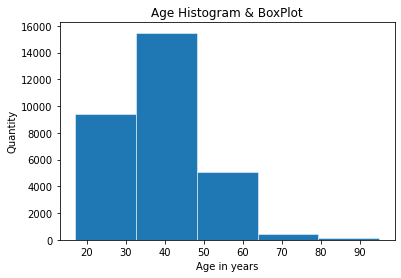

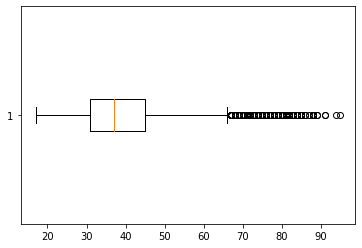

In [155]:
#age
#first numerical data

fig, ax = plt.subplots()
ax.hist(data['age'], bins=5, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Age in years", title="Age Histogram & BoxPlot")
plt.show()
build_boxplot(data['age'],ver = False)
plt.show()

In [156]:
desc(data['age'])

count    30547.000000
mean        39.030281
std         10.334463
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         95.000000
Name: age, dtype: float64


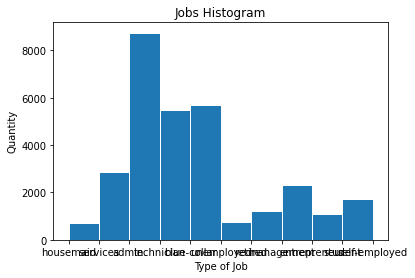

In [157]:
#Job

fig, ax = plt.subplots()
ax.hist(data['job'], bins=10, linewidth=1, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Type of Job", title="Jobs Histogram")
plt.show()

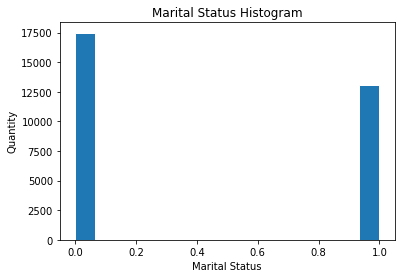

In [158]:
#marital

d = data['marital'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Marital Status", title="Marital Status Histogram")
plt.show()

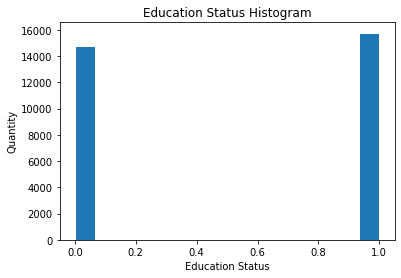

In [159]:
#education

d = data['education'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Education Status", title="Education Status Histogram")
plt.show()


In [160]:
#default

data['default'].value_counts()

False    30544
True         3
Name: default, dtype: int64

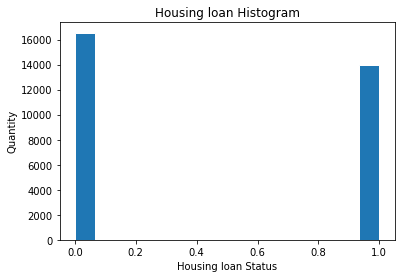

In [161]:
#housing

d = data['housing'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Housing loan Status", title="Housing loan Histogram")
plt.show()


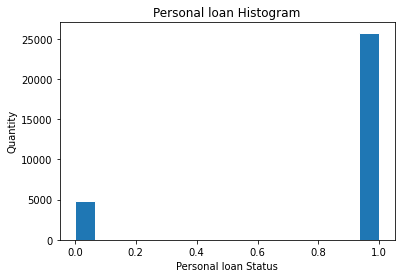

In [162]:
#loan

d = data['loan'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Personal loan Status", title="Personal loan Histogram")
plt.show()


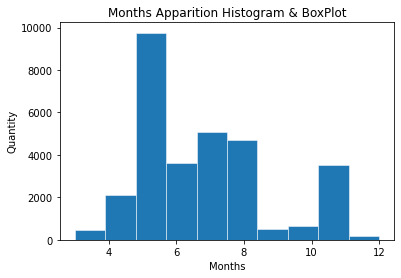

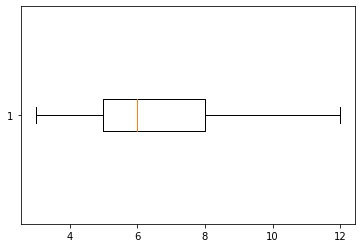

In [163]:
#months
fig, ax = plt.subplots()
ax.hist(data['month'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Months", title="Months Apparition Histogram & BoxPlot")
plt.show()
build_boxplot(data['month'],ver = False)
plt.show()

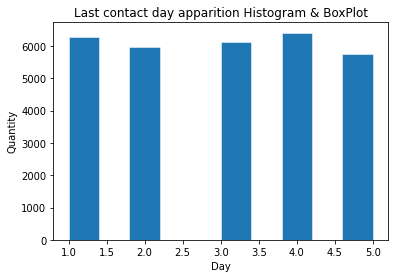

In [164]:
#day_of_week
fig, ax = plt.subplots()
ax.hist(data['day_of_week'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Day", title="Last contact day apparition Histogram & BoxPlot")
plt.show()


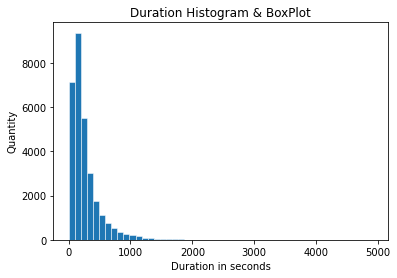

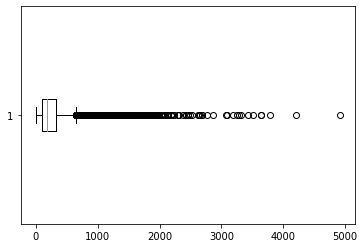

In [165]:
#duration
#2nd numerical value
fig, ax = plt.subplots()
ax.hist(data['duration'], bins=50, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Duration in seconds", title="Duration Histogram & BoxPlot")
plt.show()
build_boxplot(data['duration'],ver = False)
plt.show()


In [166]:
desc(data['duration'])

count    30547.000000
mean       259.594199
std        261.801595
min          0.000000
25%        103.000000
50%        181.000000
75%        321.000000
max       4918.000000
Name: duration, dtype: float64


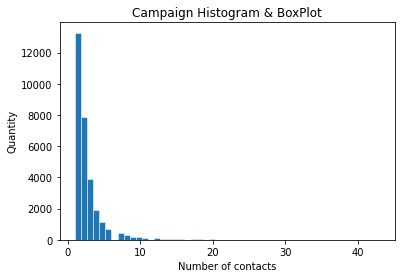

In [167]:
#campaign
fig, ax = plt.subplots()
ax.hist(data['campaign'], bins=50, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Number of contacts", title="Campaign Histogram & BoxPlot")
plt.show()

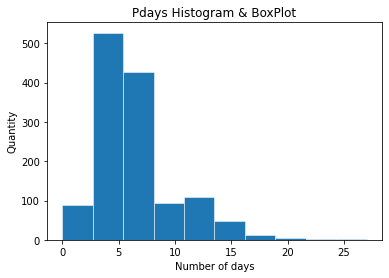

In [168]:
#pdays
#999 == no data , so we show only the data

fig, ax = plt.subplots()
ax.hist(data['pdays'][data['pdays']!=999], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Number of days", title="Pdays Histogram & BoxPlot")
plt.show()

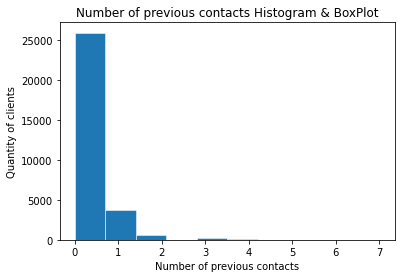

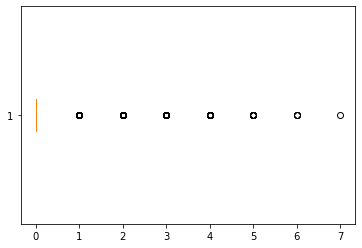

In [169]:
#previous

fig, ax = plt.subplots()
ax.hist(data['previous'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity of clients", xlabel= "Number of previous contacts", title="Number of previous contacts Histogram & BoxPlot")
plt.show()
build_boxplot(data['previous'],ver = False)
plt.show()


In [170]:
data['previous'].value_counts()

0.0    25877
1.0     3766
2.0      637
3.0      190
4.0       56
5.0       16
6.0        4
7.0        1
Name: previous, dtype: int64

In [ ]:
#poutcome

d = data['poutcome'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Outcome Status", title="Outcome of the previous marketing campaign Histogram")
plt.show()

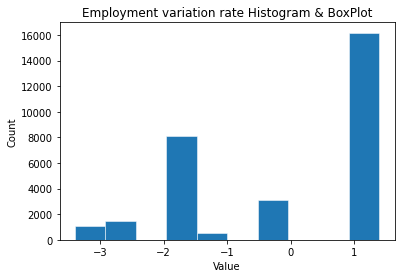

In [172]:
#emp.var.rate

fig, ax = plt.subplots()
ax.hist(data['emp.var.rate'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Value", title="Employment variation rate Histogram & BoxPlot")
plt.show()

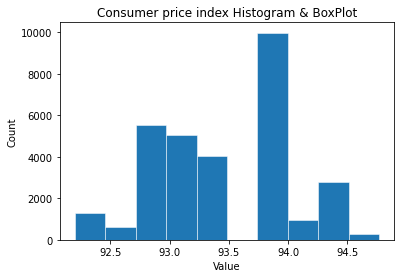

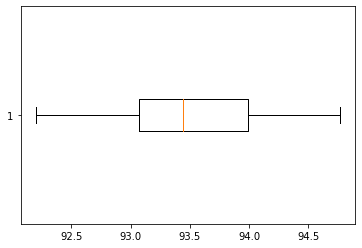

In [174]:
#cons.price.idx

fig, ax = plt.subplots()
ax.hist(data['cons.price.idx'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Value", title="Consumer price index Histogram & BoxPlot")
plt.show()
build_boxplot(data['cons.price.idx'],ver = False)
plt.show()


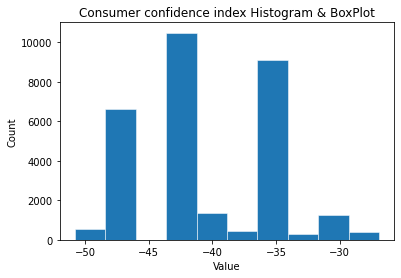

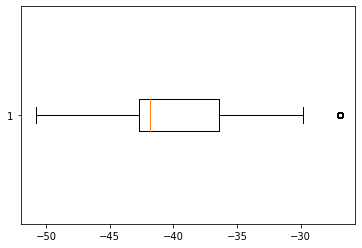

In [175]:
#cons.conf.idx

fig, ax = plt.subplots()
ax.hist(data['cons.conf.idx'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Value", title="Consumer confidence index Histogram & BoxPlot")
plt.show()
build_boxplot(data['cons.conf.idx'],ver = False)
plt.show()


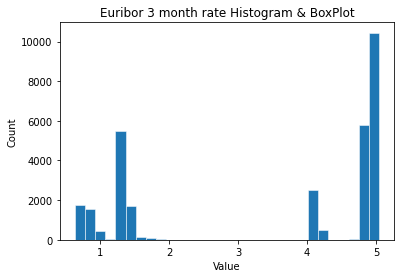

In [176]:
#euribor3m

fig, ax = plt.subplots()
ax.hist(data['euribor3m'], bins=30, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Value", title="Euribor 3 month rate Histogram & BoxPlot")
plt.show()


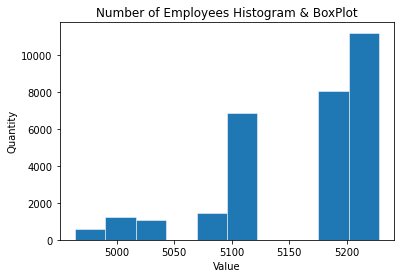

In [177]:
#nr.employed

fig, ax = plt.subplots()
ax.hist(data['nr.employed'], bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Value", title="Number of Employees Histogram & BoxPlot")
plt.show()


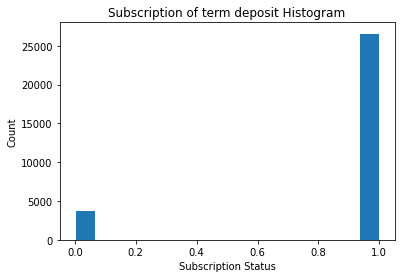

In [178]:
#y

d = data['y'].replace((True,False),(0,1))
fig, ax = plt.subplots()
ax.hist(d, bins=15, linewidth=1, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Subscription Status", title="Subscription of term deposit Histogram")
plt.show()


# **Research questions:**


1.   Does the age of the client influences on the last contact duration ?
2.   Does the age of the client influences on his orientation to contract a personal loan ?
3.   Does the number of contacts performed before this campaign and for a client influences the outcome of the previous marketing campaign ?



In [ ]:
%%shell
jupyter nbconvert --to html /content/ProjectEx1_342791324_211497235.ipynb